#  Gyroscope and Ultrasonic Sensor Result

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

In [84]:
sensor = pd.read_csv('sensor.csv')
ultra  = pd.read_csv('ultras.csv')

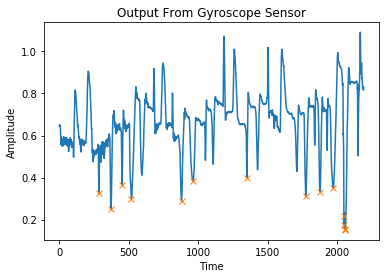

In [85]:
X_ = sensor.X
max_x = max(X_)
thresh_x = (max_x-np.mean(X_))/2
loc_x,_ = signal.find_peaks(X_,height=thresh_x)
b = np.multiply(X_,-1)
b = np.subtract(b,np.mean(b))
tt = (max(b)-np.mean(b))/2
loc_pot,_ = signal.find_peaks(b,height=tt)

plt.plot(X_)
#plt.plot(loc_x, X_[loc_x], "x")
plt.plot(loc_pot, X_[loc_pot], "x")
plt.title("Output From Gyroscope Sensor")
plt.xlabel("Time")
plt.ylabel("Amplitude")
#plt.plot(np.zeros_like(k), "--", color="gray")
plt.show()

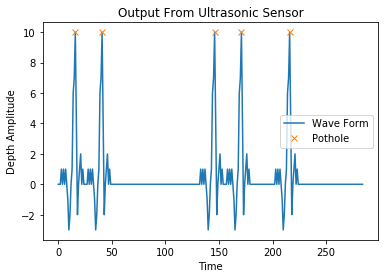

In [86]:
U = ultra.Depth

loc,_ = signal.find_peaks(U,height=4)
plt.plot(U,label="Wave Form")
plt.plot(loc, U[loc], "x",label="Pothole")
plt.title("Output From Ultrasonic Sensor")
plt.xlabel("Time")
plt.ylabel("Depth Amplitude")
plt.legend()
plt.show()

In [87]:
lat = sensor.Latitude
lon = sensor.Longitude
result_csv=[]
for i in loc_x:
    result_csv.append([lat[i],lon[i]])


In [88]:
lat1 = ultra.Latitude
lon1 = ultra.Longitude
for i in loc:
    result_csv.append([lat[i],lon[i]])

In [76]:
np.savetxt("server.csv",result_csv,delimiter=',')
np.savetxt("server.js",result_csv,delimiter=',')